In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline

# Data COVID-19 per Provinsi di Indonesia

Data yang disajikan bersifat deskriptif. Tidak ada prediksi/projeksi berbasis model ilmiah karena penyaji bukan merupakan epidemiolog.

Saat ini baru data <strong>Jawa Timur</strong> yang terkompilasikan.

# Aceh

# Sumatra Utara

# Sumatra Barat

# Riau

# Jambi

# Sumatra Selatan

# Bengkulu

# Lampung

# Kepulauan Riau

# Kepulauan Belitung

# Banten

# DKI Jakarta

# Jawa Barat

# Jawa Tengah

# Yogyakarta

# Jawa Timur

Ini merupakan data COVID-19 di Jawa Timur. Data yang disajikan bersifat eksploratif, dengan kata lain tidak ada prediksi karena penyaji bukanlah seorang epidemiolog.

Sumber data: https://covid19dev.jatimprov.go.id/xweb/draxi

Provinsi lain menyusul.

In [2]:
def get_latest_data():
    df = pd.read_csv('./data/covid-jatim.csv')
    
    # get latest data
    to_date = lambda x: x['updated_at'][:10]
    df['updated_date'] = df.apply(to_date, axis=1)
    df = df[df['updated_date'] == df.updated_date.max()]
    df = df.reset_index(drop=True)
    
    return df

In [3]:
print(f'Data terakhir diperbarui pada: {get_latest_data().updated_at.max()}')

Data terakhir diperbarui pada: 2020-04-12 16:32:21


## Peta Persebaran

Berikut adalah peta persebaran:
- orang dengan risiko (ODR)
- orang tanpa gejala (OTG),
- orang dengan pengawasan (ODP),
- pasien dengan pengawasan (PDP),
- terkonfirmasi COVID-19,
- sembuh dari COVID-19,
- meninggal akibat COVID-19

Catatan:
- semakin besar gelembung menunjukkan semakin banyak jumlah orang yang dimaksud pada poin-poin di atas.
- tekan tanda panah atau scroll ke bawah untuk melihat sub-poin dari peta persebaran.

In [4]:
def plot_map(bubble, multiplier, title):
    
    df = get_latest_data()
    
    # get base image
    BBox = ((110.750, 114.500, -8.700, -6.700))
    jatim = plt.imread('./assets/jawa-timur.png')
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.scatter(df.lon, df.lat, s=df[bubble] * multiplier, alpha=0.5)
    ax.set_title(title, fontsize=10)
    ax.imshow(jatim, zorder = 0, extent = BBox)

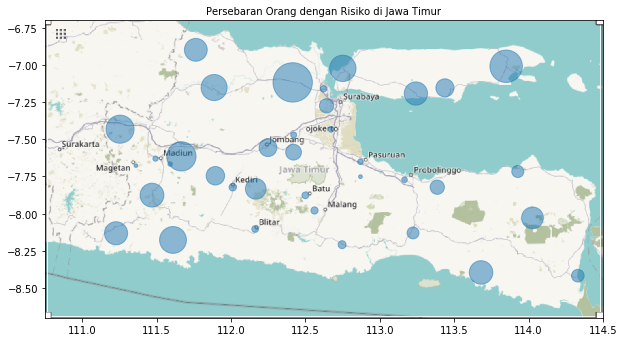

In [5]:
plot_map('odr', 0.05, 'Persebaran Orang dengan Risiko di Jawa Timur')

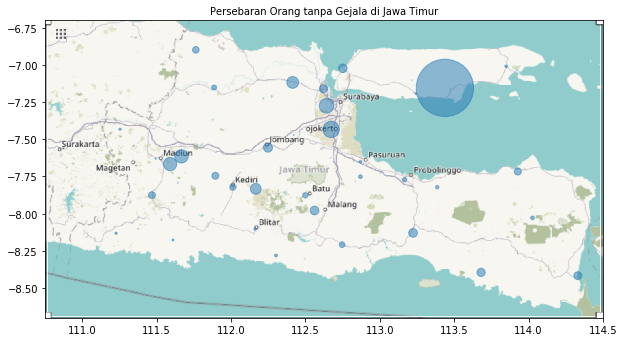

In [6]:
plot_map('otg', 0.5, 'Persebaran Orang tanpa Gejala di Jawa Timur')

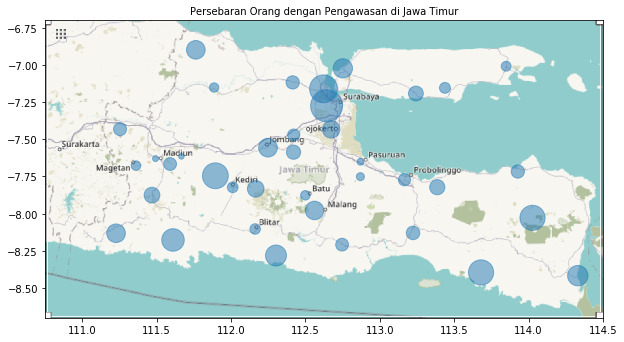

In [7]:
plot_map('odp', 0.75, 'Persebaran Orang dengan Pengawasan di Jawa Timur')

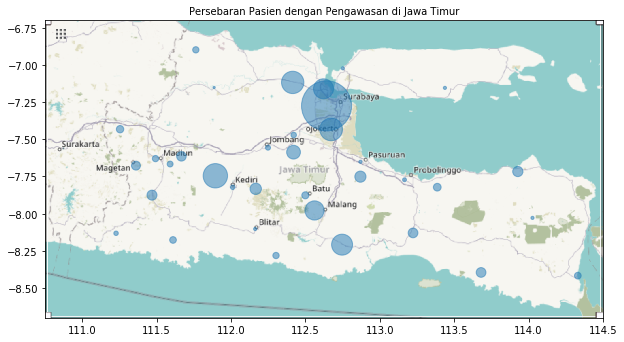

In [8]:
plot_map('pdp', 5, 'Persebaran Pasien dengan Pengawasan di Jawa Timur')

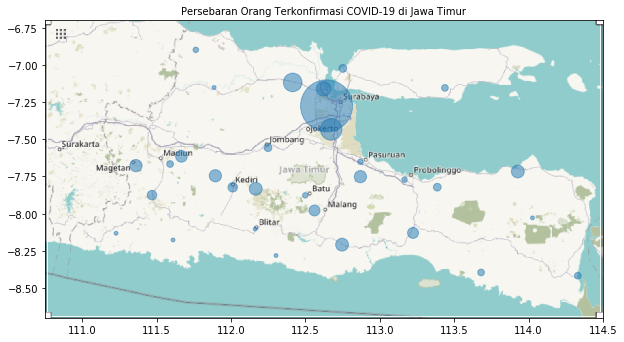

In [9]:
plot_map('confirm', 15, 'Persebaran Orang Terkonfirmasi di Jawa Timur')

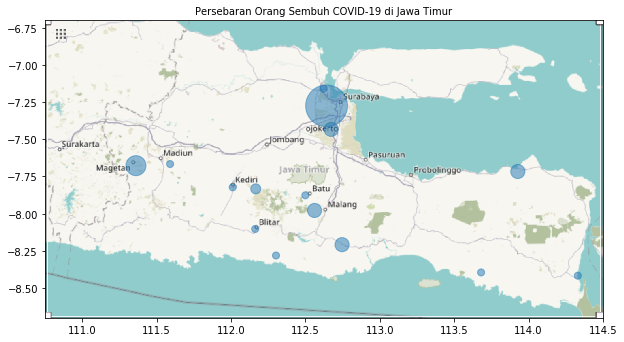

In [10]:
plot_map('sembuh', 50, 'Persebaran Orang Sembuh di Jawa Timur')

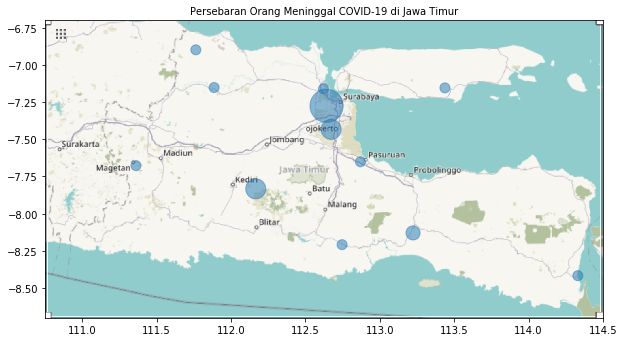

In [20]:
plot_map('meninggal', 100, 'Persebaran Orang Meninggal di Jawa Timur')

In [12]:
def rank_bar(bar, title):
    df = get_latest_data()
    df = df[['kabko', bar]]
    df = df.sort_values(by=bar, ascending=False)[:10]
    df.plot(
        kind='bar',
        x='kabko',
        figsize=(15, 7.5),
        legend=False,
        title=title
    )

## Peringkat Terbanyak

Berikut adalah 10 kabupaten dengan informasi berikut:
- orang dengan risiko (ODR)
- orang tanpa gejala (OTG),
- orang dengan pengawasan (ODP),
- pasien dengan pengawasan (PDP),
- terkonfirmasi COVID-19,
- sembuh dari COVID-19,
- meninggal akibat COVID-19

Catatan:
- tekan tanda panah atau scroll ke bawah untuk melihat sub-poin dari peringkat terbanyak.

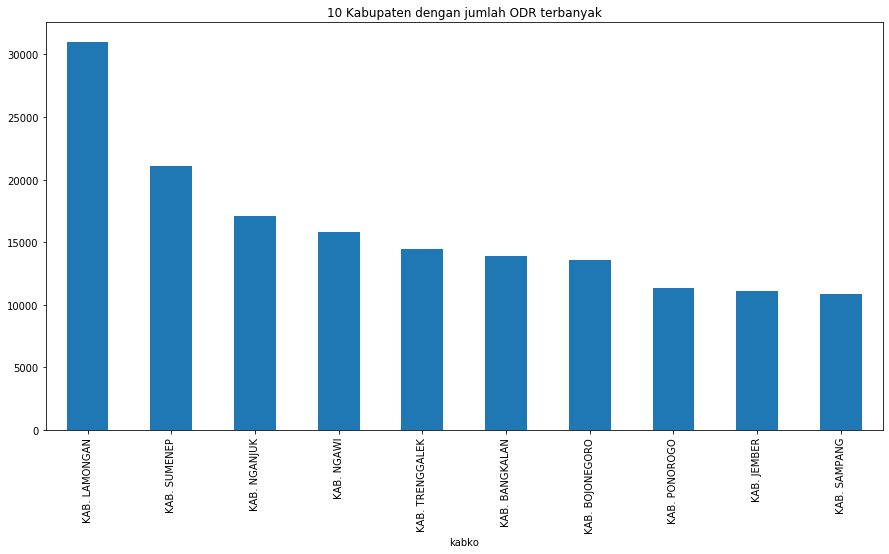

In [13]:
rank_bar('odr', '10 Kabupaten dengan jumlah ODR terbanyak')

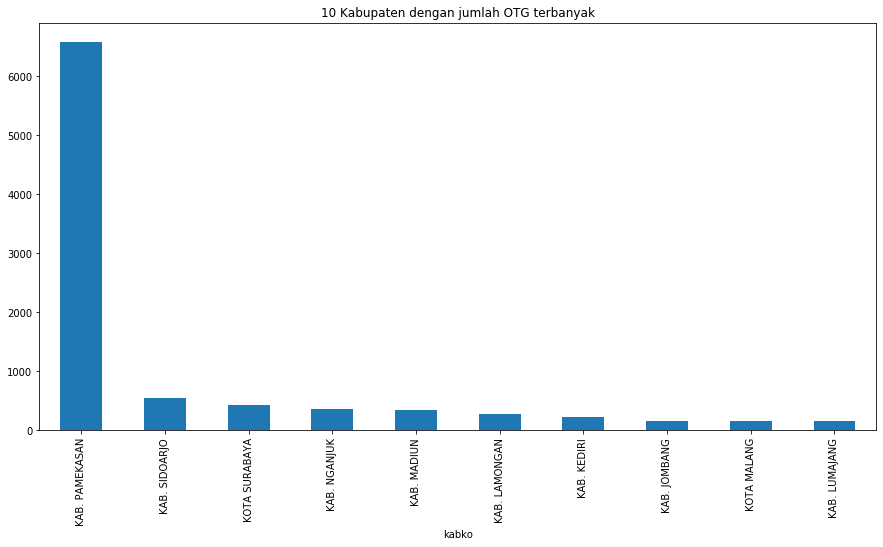

In [14]:
rank_bar('otg', '10 Kabupaten dengan jumlah OTG terbanyak')

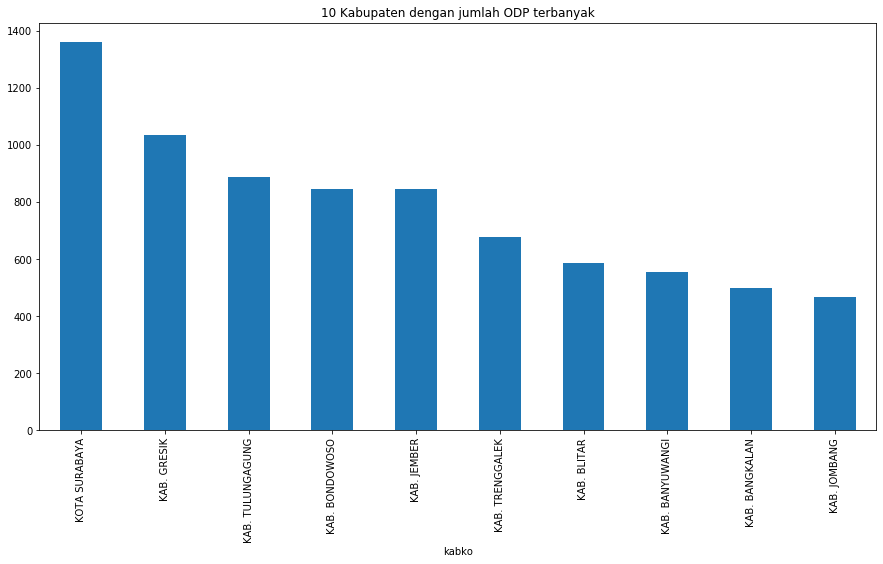

In [15]:
rank_bar('odp', '10 Kabupaten dengan jumlah ODP terbanyak')

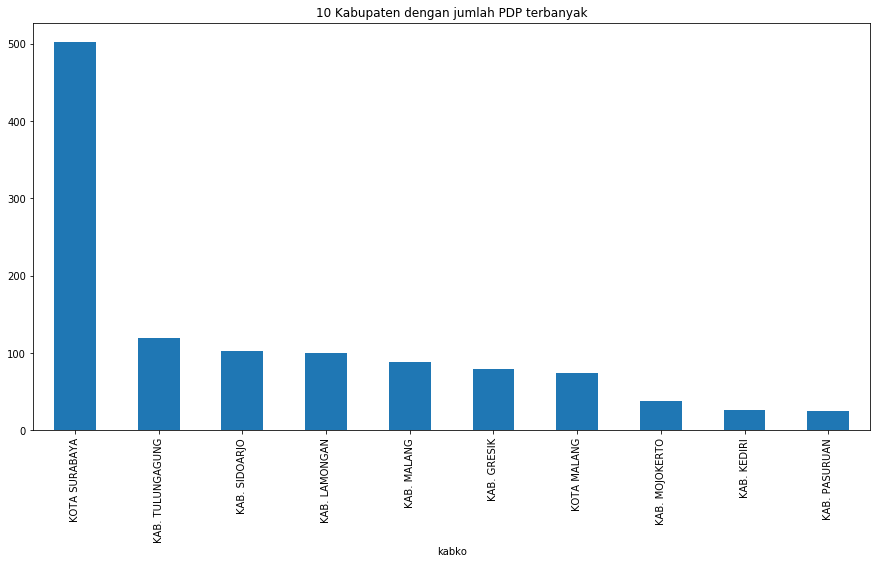

In [16]:
rank_bar('pdp', '10 Kabupaten dengan jumlah PDP terbanyak')

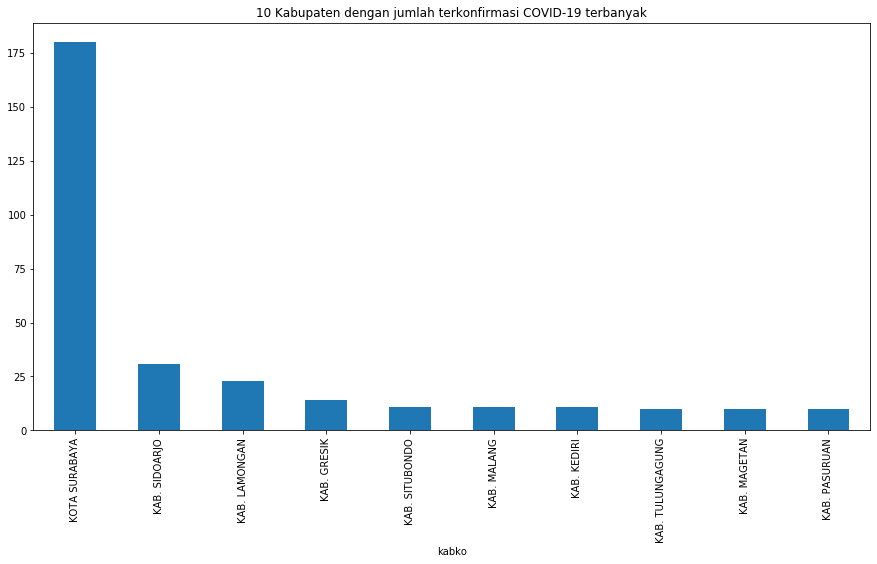

In [17]:
rank_bar('confirm', '10 Kabupaten dengan jumlah terkonfirmasi terbanyak')

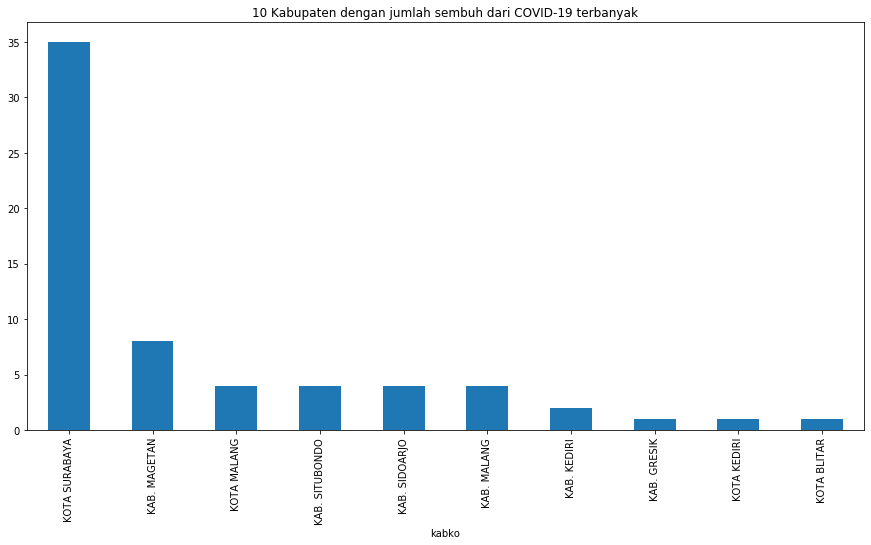

In [18]:
rank_bar('sembuh', '10 Kabupaten dengan jumlah sembuh dari terbanyak')

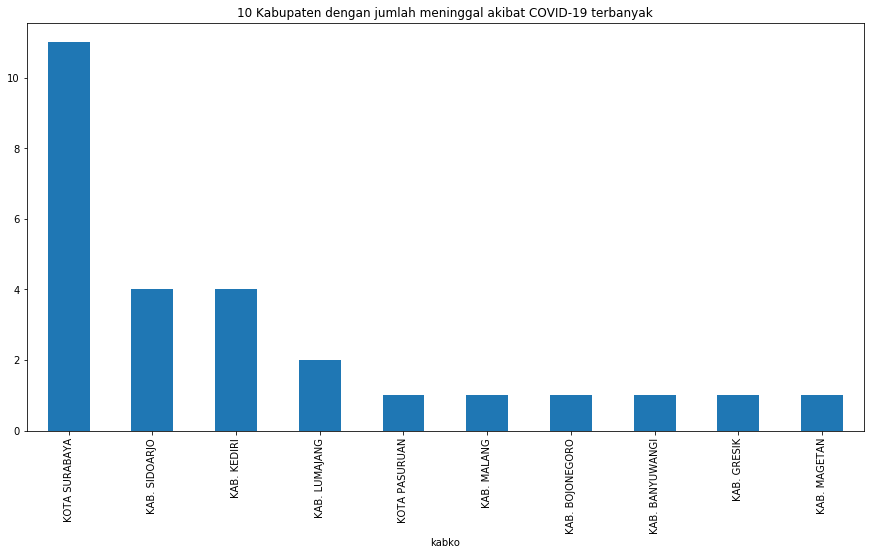

In [19]:
rank_bar('meninggal', '10 Kabupaten dengan jumlah meninggal akibat terbanyak')

# Kalimantan Barat

# Kalimantan Tengah

# Kalimantan Selatan

# Kalimantan Timur

# Kalimantan Utara

# Bali

# Nusa Tenggara Barat

# Nusa Tenggara Timur

# Sulawesi Utara

# Gorontalo

# Sulawesi Tengah

# Sulawesi Barat

# Sulawesi Selatan

# Sulawesi Tenggara

# Maluku Utara

# Maluku

# Papua Barat

# Papua